# Econ 398 Assignment 2

## Question 5 (Applied Problem)

In [1]:
library(tidyverse)
library(ggplot2)
library(haven)

Warning message:
"package 'tidyverse' was built under R version 4.4.2"
Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read in the dataset from relative path
census_data <- read_dta("../census_2021_indiv_Stata_dta_v2/cen_ind_2021_pumf_v2.dta")|>
    select(ppsort:weight)|>
    glimpse()

Rows: 980,868
Columns: 128
$ ppsort           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ aboid            <dbl+lbl> 6, 6, 1, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ agegrp           <dbl+lbl> 13, 11, 13, 16, 18, 16, 16, 16, 11, 12, 16, 13, 1…
$ ageimm           <dbl+lbl>  7,  5, 99, 99, 99, 99, 99,  7, 99,  6, 99, 99,  …
$ attsch           <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 2, 2…
$ bfnmemb          <dbl+lbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bedrm            <dbl+lbl> 4, 3, 0, 4, 3, 4, 3, 4, 4, 4, 1, 4, 5, 2, 2, 2, 3…
$ CFInc            <dbl+lbl> 30, 18,  7, 15, 13,  1, 10, 30, 25, 22,  9, 33, 2…
$ CFInc_AT         <dbl+lbl> 27, 18,  7, 15, 13,  1, 10, 27, 24, 22,  9, 32, 2…
$ cfstat           <dbl+lbl> 2, 2, 6, 2, 3, 7, 1, 1, 2, 2, 1, 2, 2, 1, 5, 5, 5…
$ chdbn            <dbl> 88888888, 11500, 99999999, 99999999, 99999999, 999999…
$ CIP2021          <dbl+lbl>  7,  8, 13, 10, 13, 13,  4,  4, 88, 13,  7,  5, 1…
$ CIP2021_STE

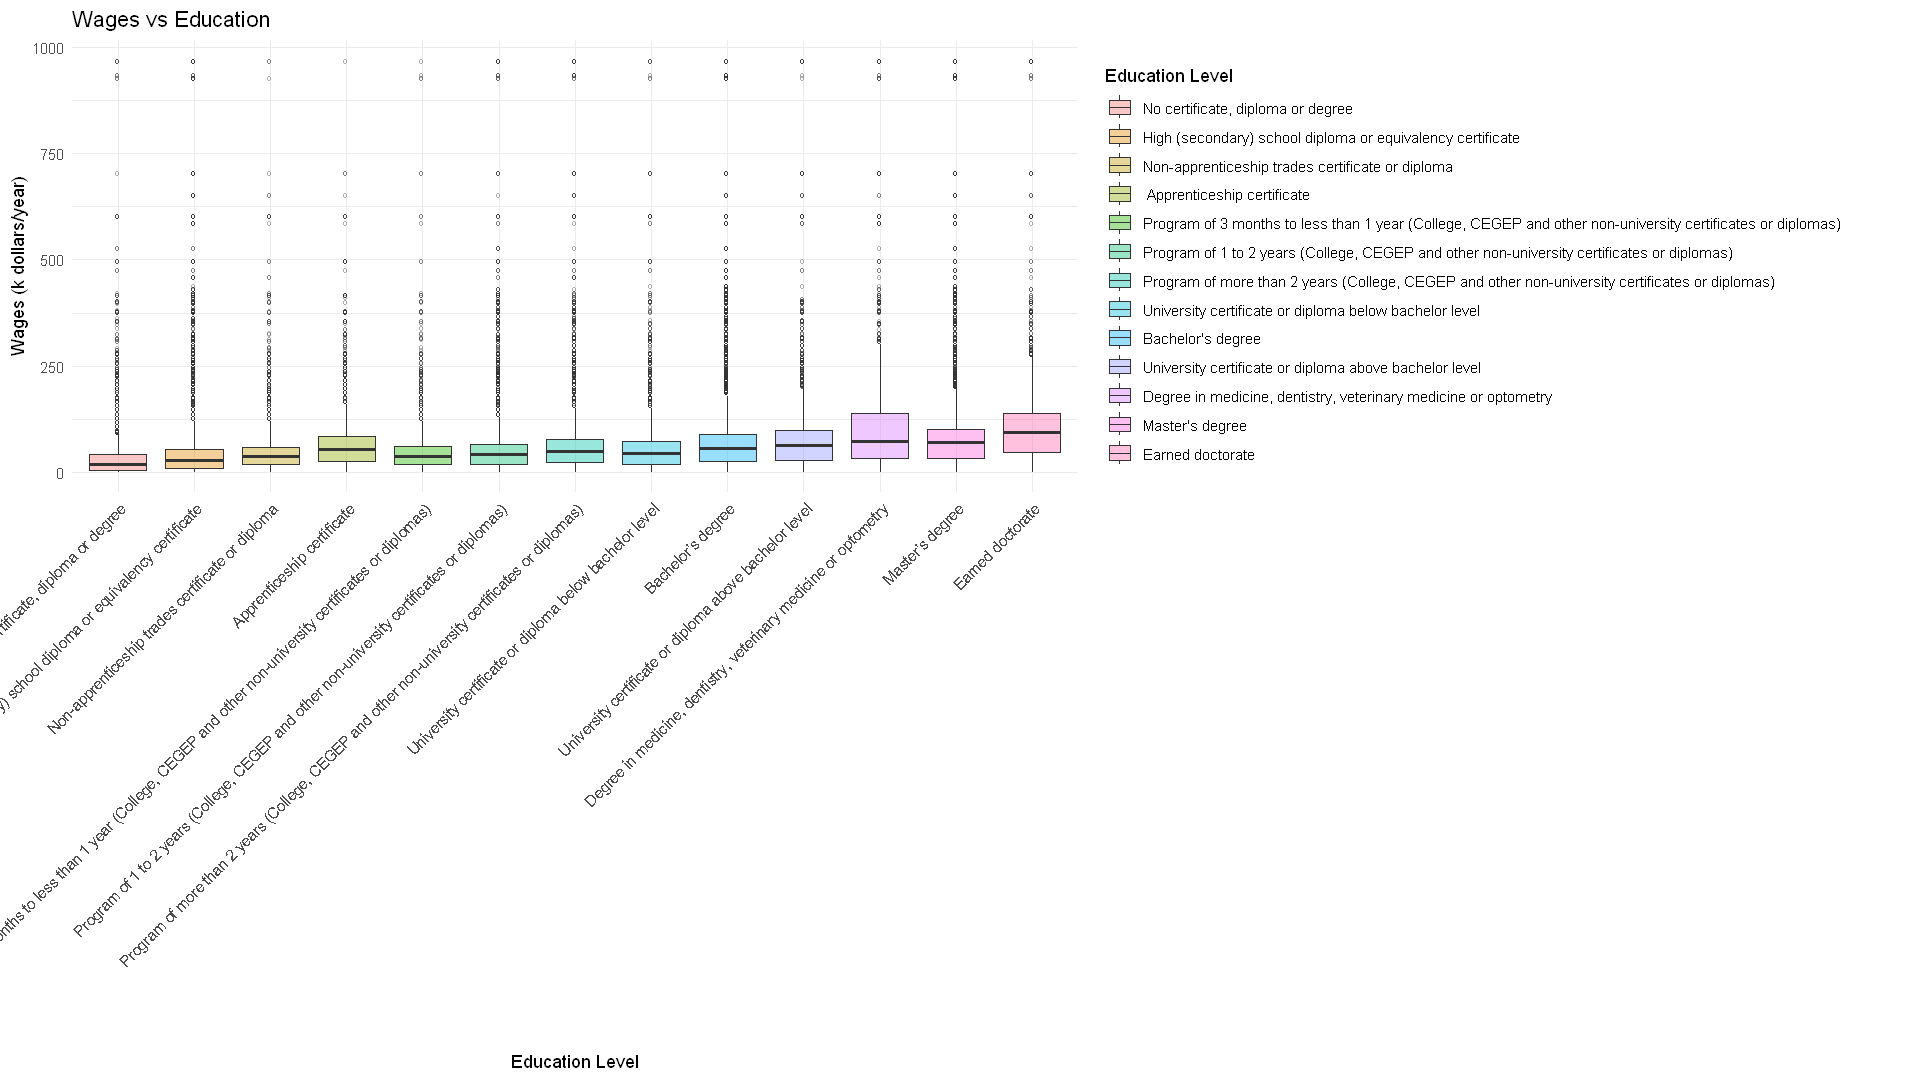

In [3]:
# We want to show the distribution of wages against education with boxplot
options(repr.plot.width = 16, repr.plot.height = 9)

# In this field we want to drop NA data and confounding data
census_data <- census_data|>
    filter(hdgree != 99 & hdgree  != 88 & !is.na(hdgree))|> # Filter out NA and confounding groups
    filter(1 < Wages & Wages != 88888888 & Wages != 99999999) # Filter out special coding for NA or non labour force data

plot_data <- census_data|>
    select(hdgree, Wages)|>
    mutate(hdgree = as_factor(hdgree))|>
    mutate(Wages = Wages/1000)

wages_education_dist <- plot_data|>
    ggplot(aes(x = hdgree, y = Wages, fill = hdgree)) + 
    geom_boxplot(alpha = 0.4, outlier.shape = "o") + 
    labs(title = "Wages vs Education", x = "Education Level", y = "Wages (k dollars/year)", fill = "Education Level") + 
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

wages_education_dist

From the plot above we already noticed that people who received university education tend to have higher wages, but we want to be more specific with the support of data.

In [4]:
# Take the subpopulation of those who attended university and those who didn't
# By referring to the document, I confirmed it was recorded under hdgree variable with code >= 8
high_edu_data <- census_data|>
    filter(hdgree >= 8)

print(paste("People who attended university: ", distinct(high_edu_data, hdgree), ", with number of observations: ", nrow(high_edu_data)))

# In this field we want to drop NA data and confounding data
low_edu_data <- census_data|>
    filter(hdgree < 8)

print(paste("People who didn't attend university: ", distinct(low_edu_data, hdgree), ", with number of observations: ", nrow(low_edu_data)))

[1] "People who attended university:  c(12, 9, 8, 13, 11, 10) , with number of observations:  172276"
[1] "People who didn't attend university:  c(7, 6, 2, 1, 4, 3, 5) , with number of observations:  333567"


In [5]:
# We begin by making the direct comparison of average wages
uni_avg_income <- mean(high_edu_data$Wages)

print(paste("The mean wages for those who received university education is: $", round(uni_avg_income,2)))

non_uni_avg_income <- mean(low_edu_data$Wages)

print(paste("The mean wages for those who didn't receive university education is: $", round(non_uni_avg_income,2)))

income_difference <- uni_avg_income - non_uni_avg_income

print(paste("The difference in mean wages between those who received university education and those who didn't is: $", round(income_difference,2)))

[1] "The mean wages for those who received university education is: $ 72805.37"
[1] "The mean wages for those who didn't receive university education is: $ 43223"
[1] "The difference in mean wages between those who received university education and those who didn't is: $ 29582.37"


Therefore, it is obvious that people who received university education earn more than those who didn't. We can use visualization to improve the analysis.

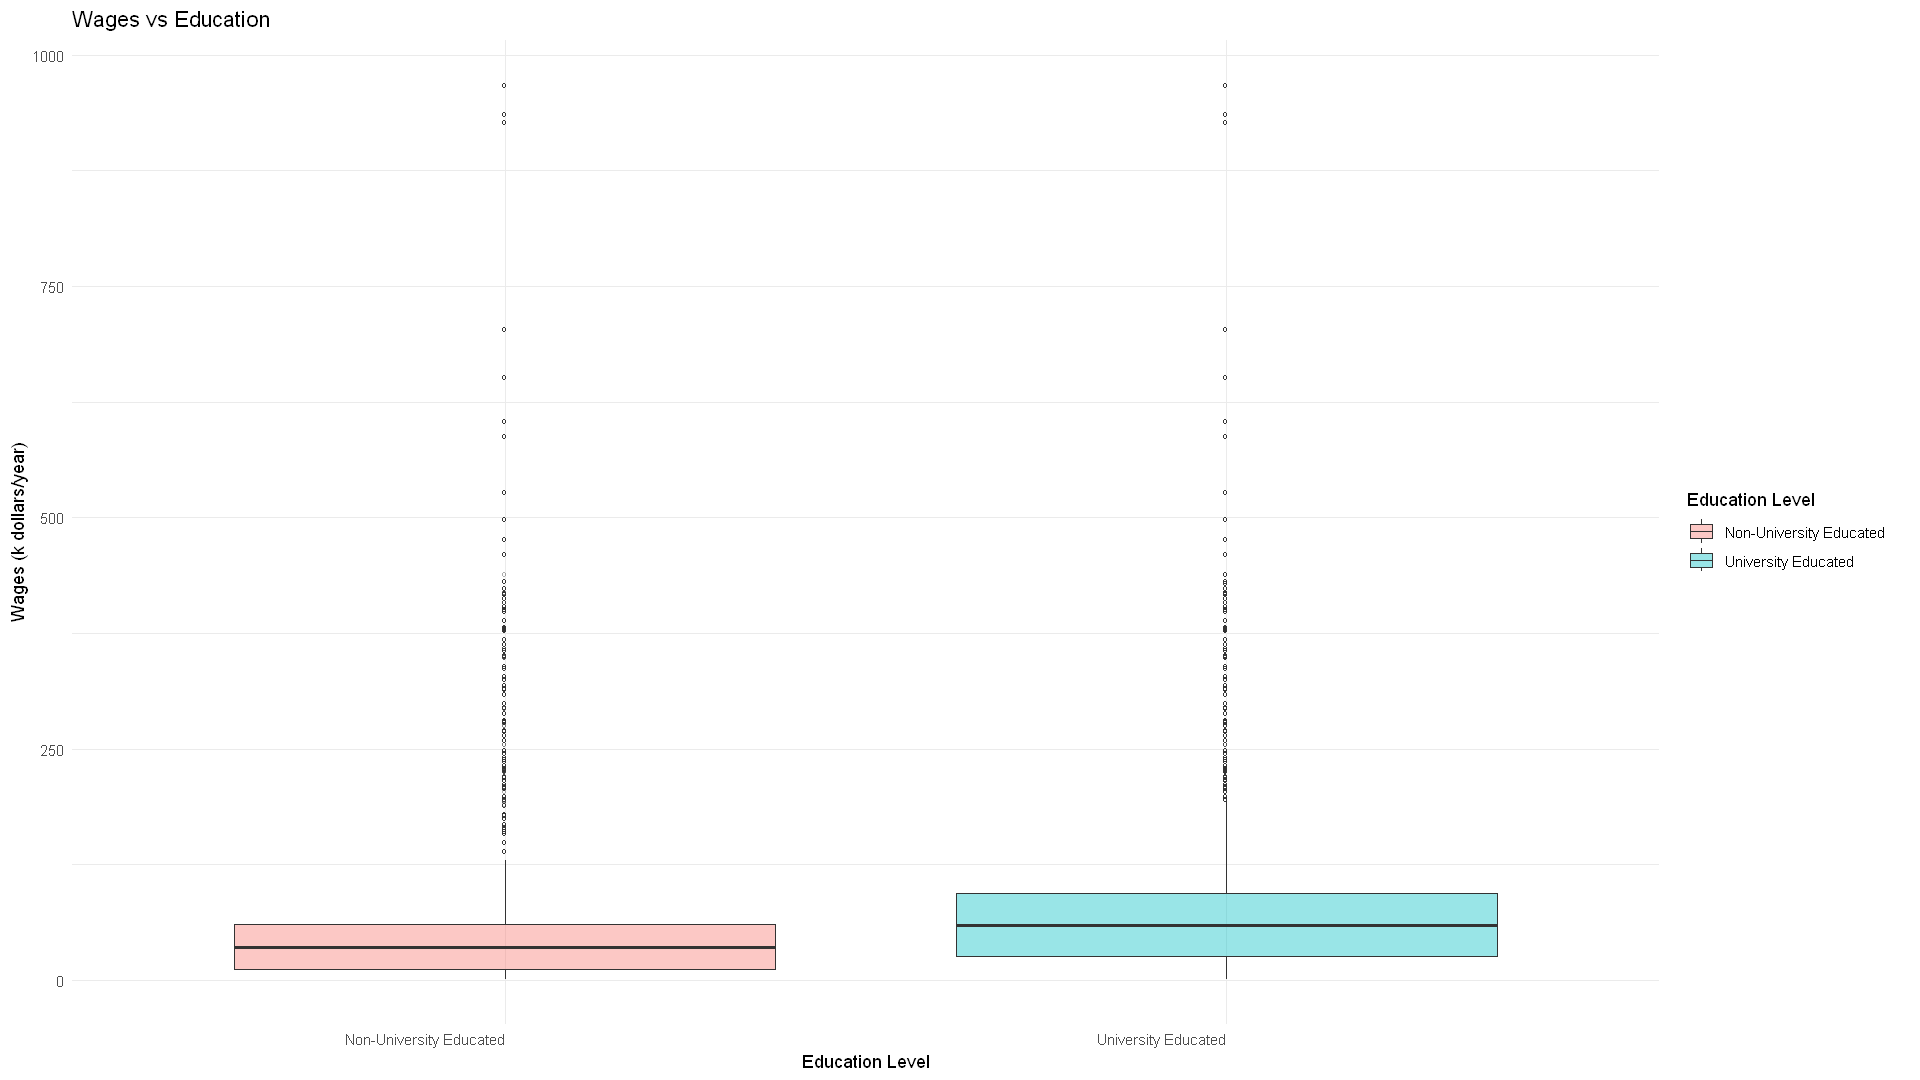

In [6]:
# We do a visualization of those who received university education and those who are not
census_data <- census_data|>
    mutate(uni = ifelse(hdgree >= 8, "University Educated", "Non-University Educated"))

plot_data <- census_data|>
    select(uni, Wages)|>
    mutate(uni = as_factor(uni))|>
    mutate(Wages = Wages/1000)

uni_dist <- plot_data|>
    ggplot(aes(x = uni, y = Wages, fill = uni)) + 
    geom_boxplot(alpha = 0.4, outlier.shape = "o") + 
    labs(title = "Wages vs Education", x = "Education Level", y = "Wages (k dollars/year)", fill = "Education Level") + 
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 0, hjust = 1))

uni_dist

Therefore, we may conclude that if we simply take "receiving university education" as the treatment, we indeed observed higher average wages as the outcome.

However, it is noticeable that the selection bias attributable to failure in balancing does exist in this analysis. 

For example, we didn't control for various factors that may correlate with the potential outcome such as gender, nationality, marriage and so on. 

It is also noticeable that the treatment isn't randomly assigned, but involve endogeneity and confoundedness, such as cleverness of the individual may be a cause to both the university education and a higher income.

Furthermore, the data is itself unbalanced in terms of the proportion. We noticed there are 172276 observations with university level (and above) education, while there are 333567 observations without university education. This would lead to a selection bias itself.

I can show the existence of selection bias with examples below.

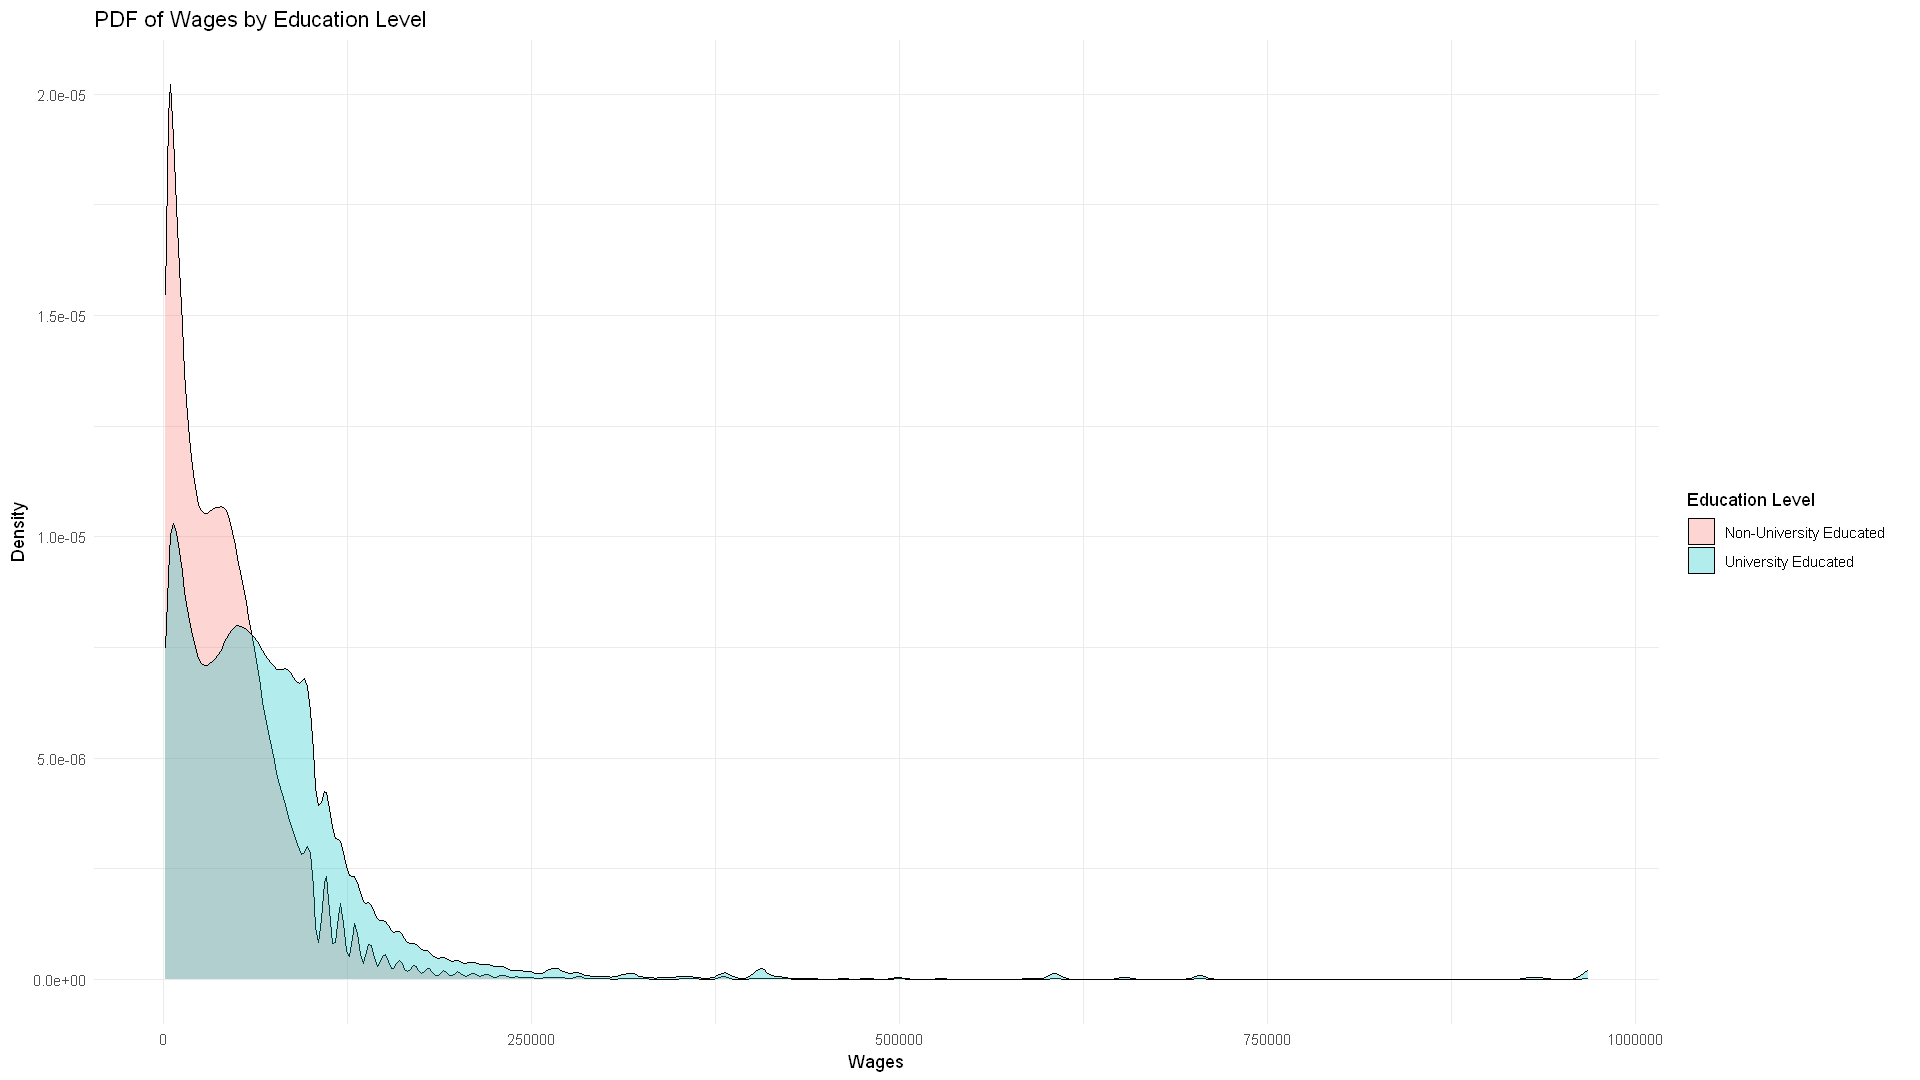

In [7]:
# Visualize the PDF of Wage distribution conditional on education level
ggplot(census_data, aes(x = Wages, fill = uni)) +
    geom_density(alpha = 0.3) +  
    labs(title = "PDF of Wages by Education Level", x = "Wages", y = "Density", fill = "Education Level") +
    theme_minimal()

This tells us the difference in proportion may bring bias to our analysis.

In [8]:
# We can also show the existence of bias due not taking into account other factors

prop_imm_uni <- sum(high_edu_data$Citizen == 2)/sum(census_data$Citizen == 2)

prop_born_uni <- sum(high_edu_data$Citizen == 1)/sum(census_data$Citizen == 1)

prop_neither_uni <- sum(high_edu_data$Citizen == 3)/sum(census_data$Citizen == 3)

print(paste("We noticed the proportion of born citizen who attended university is: ", prop_born_uni,
    ", the proportion of immigrant who attended university is: ", prop_imm_uni,
    ", and the proportion of non-citizen, non-immigrant who attended university is: ", prop_neither_uni, "."))

[1] "We noticed the proportion of born citizen who attended university is:  0.281273549359457 , the proportion of immigrant who attended university is:  0.479119931928436 , and the proportion of non-citizen, non-immigrant who attended university is:  0.527557130636686 ."


Therefore, conditional on the citizenship status, we can observe a clear bias that is correlated to the treatment.

We conclude that although we observed large average treatment effect in the analysis, it's likely to be very biased because we didn't solve the balancing problem by introducing good control. 